In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)
X_train_n = X_train[:,:,:, None]
# import numpy as np
# X_train_n = X_train[:,:,:, np.newaxis]
print(X_train_n.shape)
X_test_n = X_test[:,:,:, None]

(60000, 28, 28)
(60000, 28, 28, 1)


In [8]:
# Normalisierung
X_train_n = X_train_n/255
X_test_n = X_test_n/255

In [9]:
print(X_train[0])
print()
print(X_train_n[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

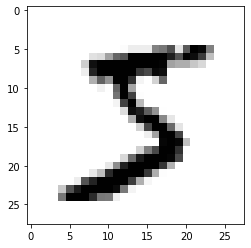

In [14]:
plt.imshow(X_train[0], cmap = 'binary')
plt.show()

In [17]:
model = Sequential()

model.add(Conv2D(32, 
                 (3,3), 
                 activation = 'relu', 
                 input_shape= (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [18]:
model.fit(X_train_n, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.1596 - accuracy: 0.9511
Epoch 2/3
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0535 - accuracy: 0.9835
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.0374 - accuracy: 0.9883


In [20]:
val_loss, val_acc = model.evaluate(X_test_n, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

Validation Loss: 0.04020326007268741
Validation Accuracy: 0.9876
